In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (20, 15)

# Lab 3

## Problem 1

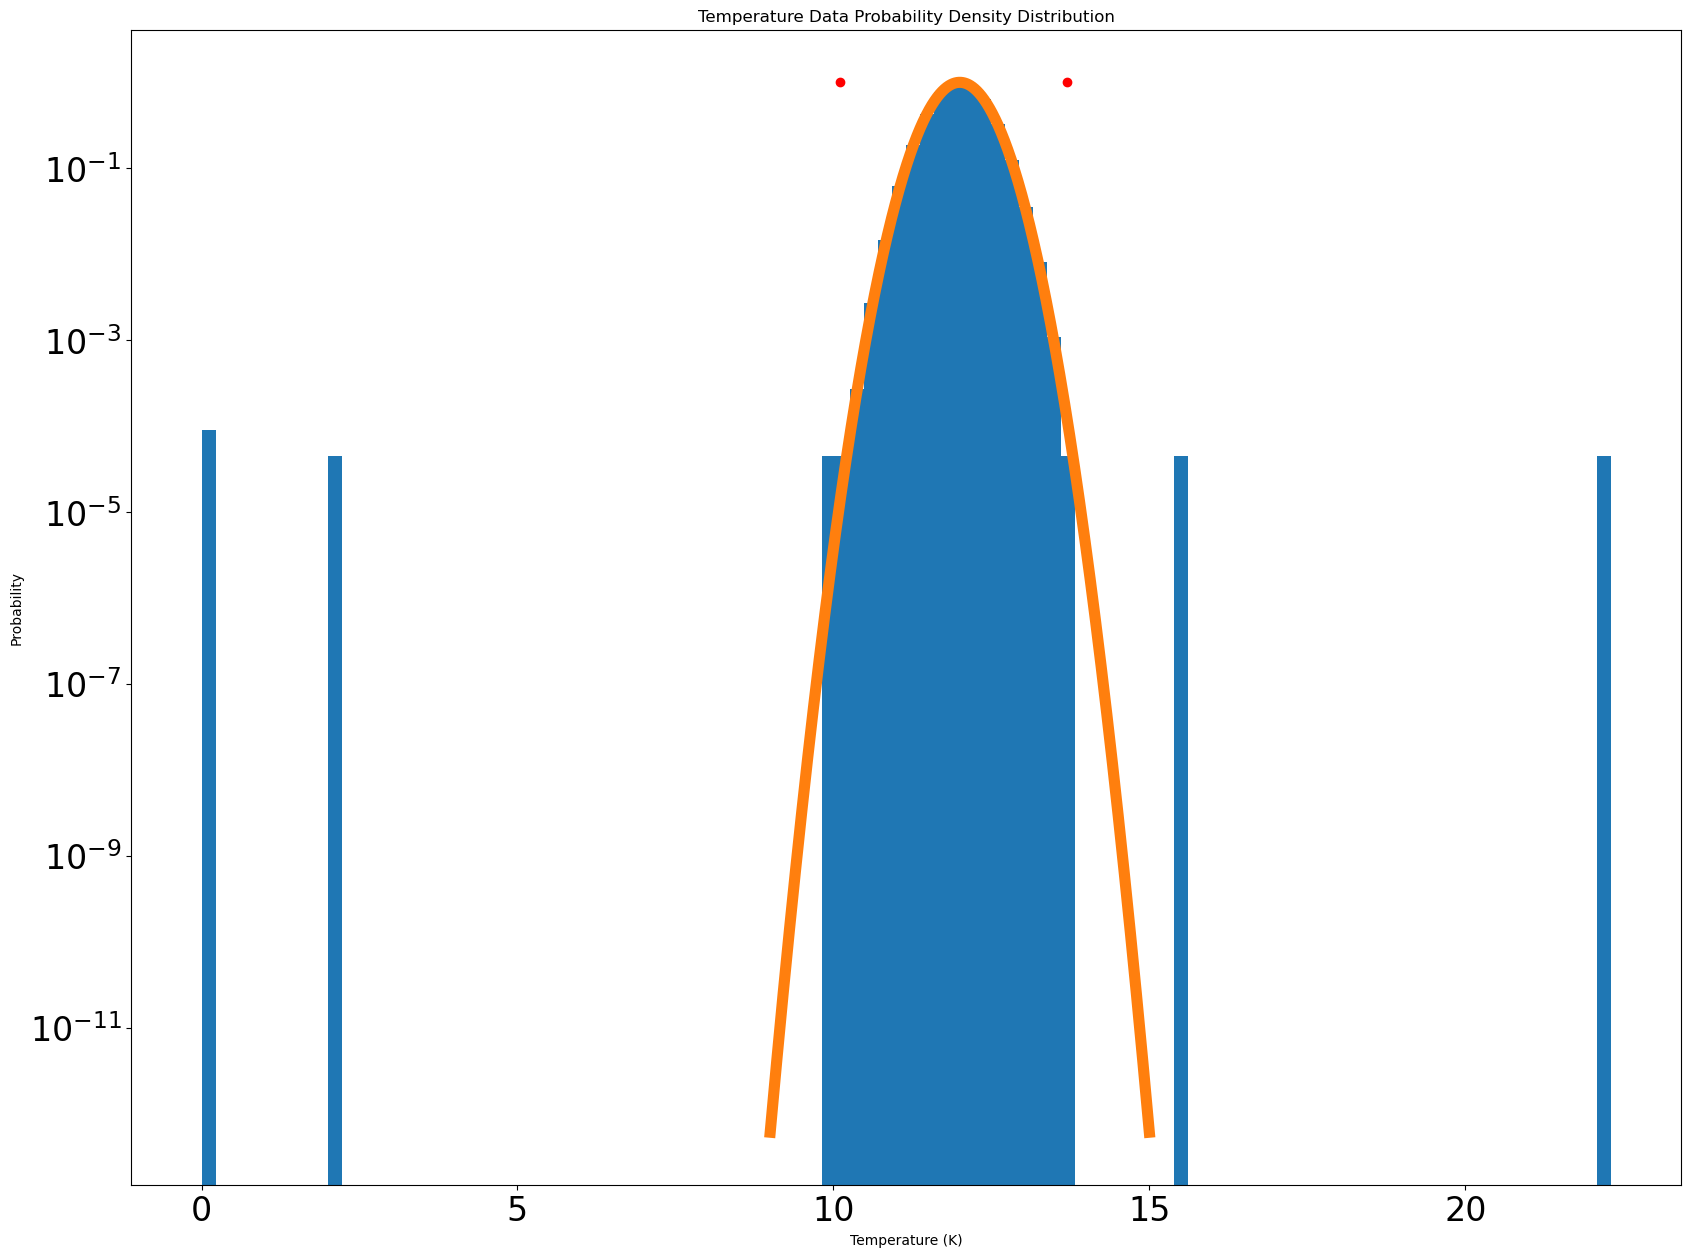

In [3]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.linspace(9,15,1000)

# Two points to observe
a = [10.1, 13.7]
y = [1.0000001, 1.0000001]

ax.plot(a, y, 'o', color = 'red')
ax.plot(x,stats.norm.pdf(x,loc = 12., scale = 0.4),linewidth = 8,alpha = 1)
plt.title('Temperature Data Probability Density Distribution')
plt.xlabel('Temperature (K)')
plt.ylabel('Probability')
plt.show()

### A

1. I plot a background of Gaussian distribution that matches most of the good data points.
2. What region or range of sigma covers most of the good data points while it excludes most of the bad data points?
   I choose this statistical question as it is really hard or even impossible to eliminate all of the bad data points given that most of the good data points must be preserved (If all bad data points are    eliminated, a noticeable portion of the good data points will also be eliminated)
3. $X_{max}\sigma_{max} = \frac{1}{2}erfc(\frac{X_{max}}{\sqrt{2}})$ <br> $X_{min}\sigma_{min} = \frac{1}{2}erfc(\frac{X_{min}}{\sqrt{2}})$   (remember to put integration in)

In [4]:
minimum_prob = stats.norm.sf(10.1, loc = 12, scale = 0.4)
print(minimum_prob)
maximum_prob = stats.norm.sf(13.7, loc = 12, scale = 0.4)
print(maximum_prob)
minimum_sigma = stats.norm.ppf(1 - minimum_prob)
print(minimum_sigma)
maximum_sigma = stats.norm.ppf(1 - maximum_prob)
print(maximum_sigma)

0.9999989829167575
1.06885257749345e-05
-4.750000000010472
4.250000000000626


4. Table:

|   | True T | Bad T |
| --- | --- | --- |
|Your Test Good | 100000 | 2 |
|Your Test Bad | 0 | 6 |


#### B

The smaller the statistical threshold I chose, the more the numbe rof omissions. Therefore, I chose the best statistical threshold that minimizes the number of omissions by observing the combination of the data histogram and the background Gaussian distribution and it is predictable quantity.

### C

Yes, there are mistakes of commission. It is technically avoidable but that would eliminate numerous good data, which means it is practically unavoidable. Any data outside by statistcal threshold is bad data, but the mistakes can happen in my statistical threshold.

## Problem 2

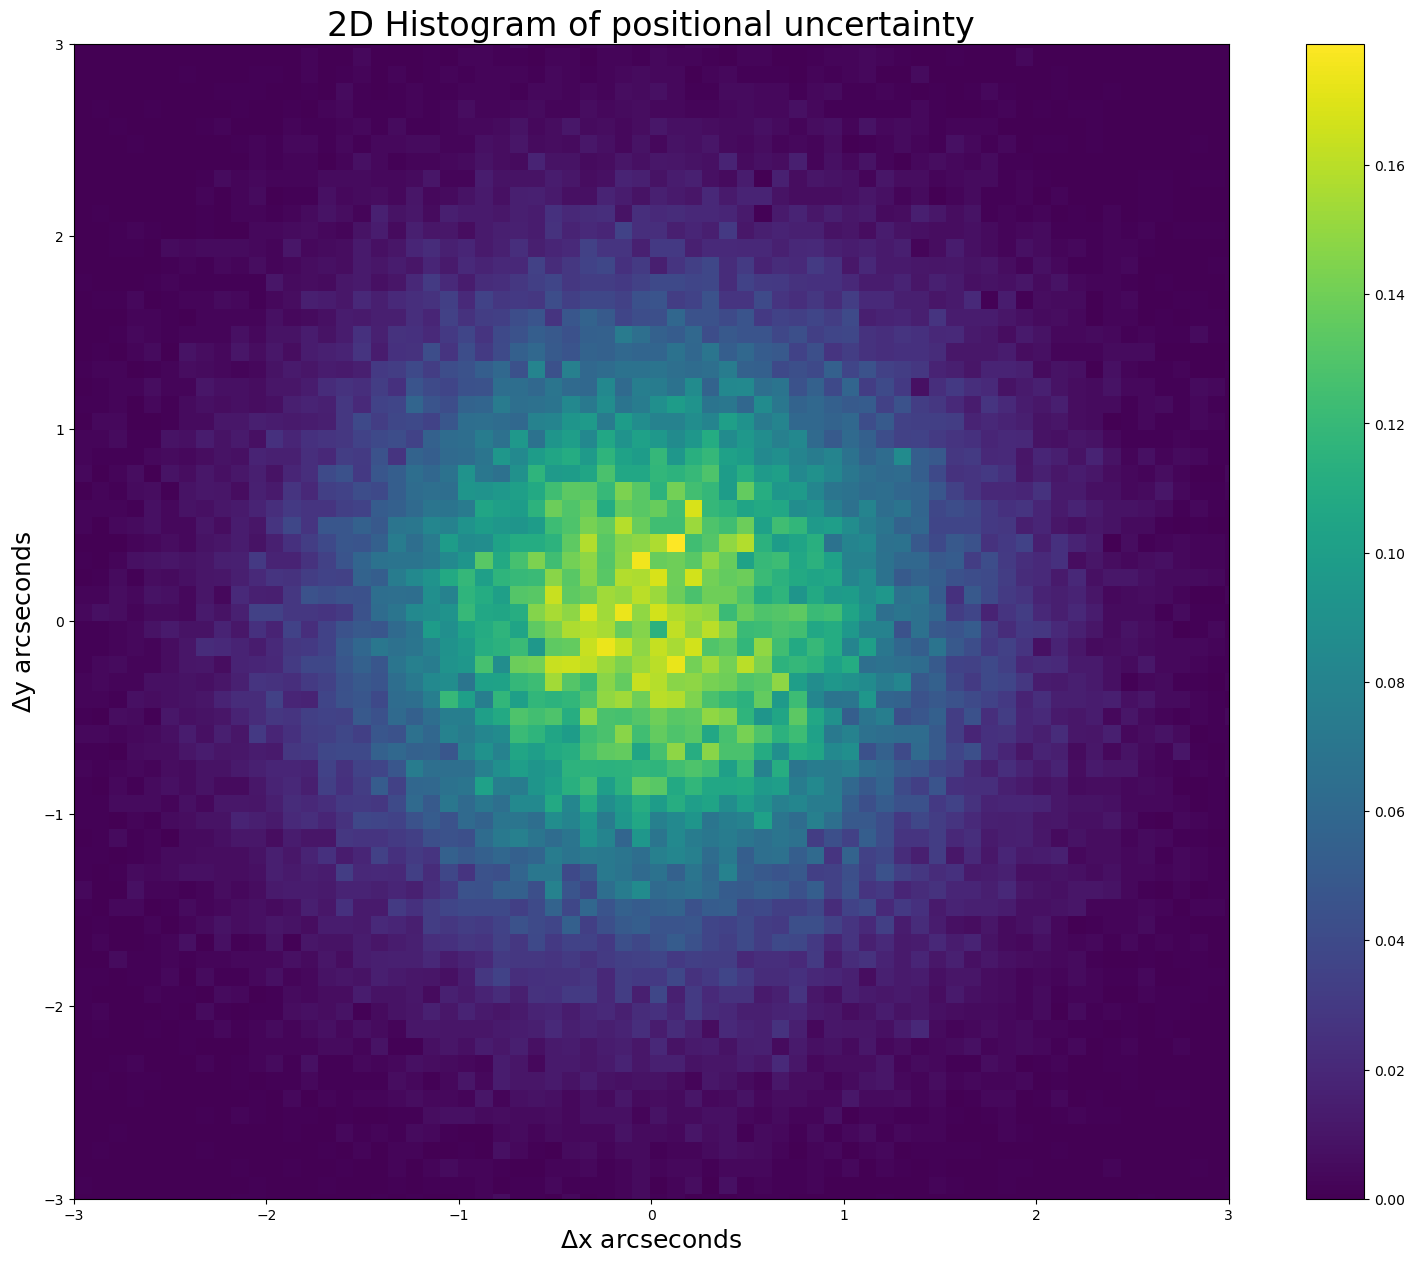

In [5]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

### 1.

In the 2D Gaussian with 1 arcsecond RMS, how far away from the origin it needs to be in order to produce a movement that has 5 significance?

### 2.

In [6]:
sigma5 = stats.norm.sf(5)
print(sigma5)

2.866515718791933e-07


What is the position value p that will make $P(p < r < \infty) = 2.8665*10^{-7}$?

### 3.

$distance = \sqrt{x^2 + y^2}$ = rayleigh distribution

In [8]:
r = stats.rayleigh(scale = 1)
distance = stats.rayleigh.ppf(1 - sigma5)
print(distance)

5.489079776034238


5 sigma detection of motion --> 5.489079776034238 arcseconds

## Problem 3

### 1.

What is the probability that the observation gives us the background cosmic rays of 6800 or less given that there is 1 cosmic ray per minute and a moon is observed 8 hours a day for 15 days?

### 2.

$Mean = 1 * 60 * 8 * 15 = 7200$ <br>
Therefore, the background cosmic ray is poisson distribution so we take the integral from 0 to 6800 over the poisson distribution's pdf with a mean of 7200.

### 3.

In [14]:
mu = 7200
d = stats.poisson(7200)
probability = d.cdf(6800) #since it is from the left 
print(probability)
sigma = stats.norm.ppf(1 - probability)
print(sigma)

1.0133280183917768e-06
4.750747965778662


The significance of our moon shadow detection = 4.75 $\sigma$